## Importing dataset and preprocessing


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2025-11-25 18:34:01--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.184.207, 142.251.189.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.184.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.07s   

2025-11-25 18:34:01 (77.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
data = pd.read_json("./sarcasm.json")
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['is_sarcastic'], test_size=0.2)

In [7]:
##define the parameters for the tokenizing and padding

vocab_size = 10000
oov_tok = "<OOV>"
embedding_dim = 16

max_length = 150
trunc_type='post'
pad_type ='post'

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)


## Model


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))


Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5607 - loss: 0.6860 - val_accuracy: 0.5631 - val_loss: 0.6803
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5854 - loss: 0.6654 - val_accuracy: 0.7514 - val_loss: 0.5492
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7795 - loss: 0.4971 - val_accuracy: 0.8117 - val_loss: 0.4252
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8195 - loss: 0.4047 - val_accuracy: 0.8068 - val_loss: 0.4146
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8383 - loss: 0.3768 - val_accuracy: 0.8411 - val_loss: 0.3651
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8612 - loss: 0.3303 - val_accuracy: 0.8521 - val_loss: 0.3514
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8643 - loss: 0.3185 - val_accuracy: 0.8559 - val_loss: 0.3406
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8664 - loss: 0.3034 - val_accuracy: 0

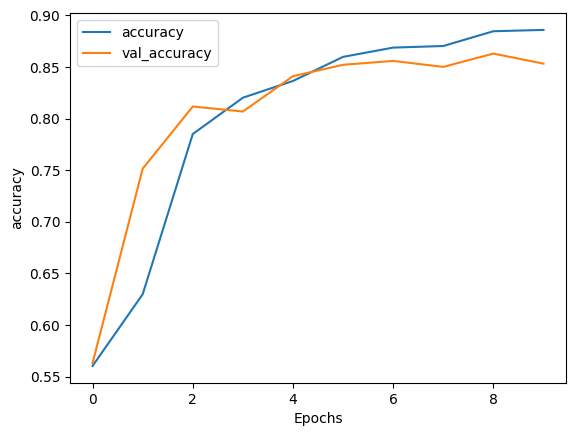

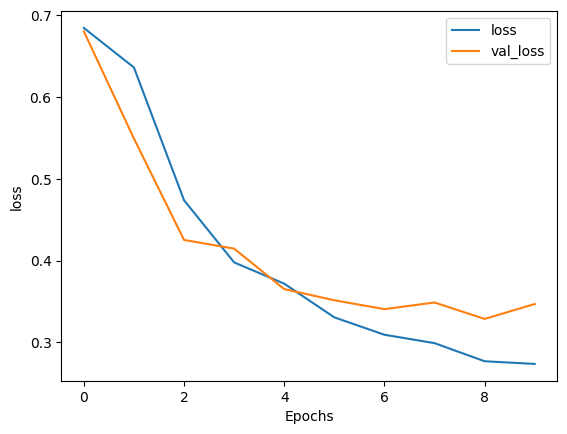

In [10]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.14393829]]


In [12]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 146s 205ms/step - accuracy: 0.7185 - loss: 0.5206 - val_accuracy: 0.8572 - val_loss: 0.3271
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 142s 205ms/step - accuracy: 0.9045 - loss: 0.2351 - val_accuracy: 0.8570 - val_loss: 0.3241
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 138s 206ms/step - accuracy: 0.9366 - loss: 0.1760 - val_accuracy: 0.8476 - val_loss: 0.3527
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 137s 205ms/step - accuracy: 0.9458 - loss: 0.1501 - val_accuracy: 0.8487 - val_loss: 0.4129
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 134s 201ms/step - accuracy: 0.9612 - loss: 0.1119 - val_accuracy: 0.8441 - val_loss: 0.4326
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 142s 202ms/step - accuracy: 0.9698 - loss: 0.0939 - val_accuracy: 0.8467 - val_loss: 0.4964
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 138s 206ms/step - accuracy: 0.9723 - loss: 0.0853 - val_accuracy: 0.8443 - val_loss: 0.5307
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 138s 200ms/step - accuracy: 0.9777 -

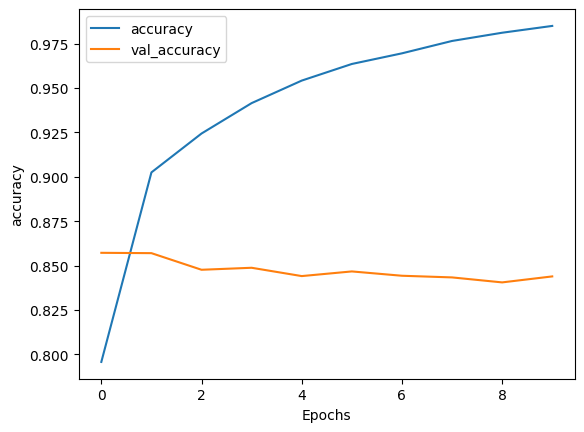

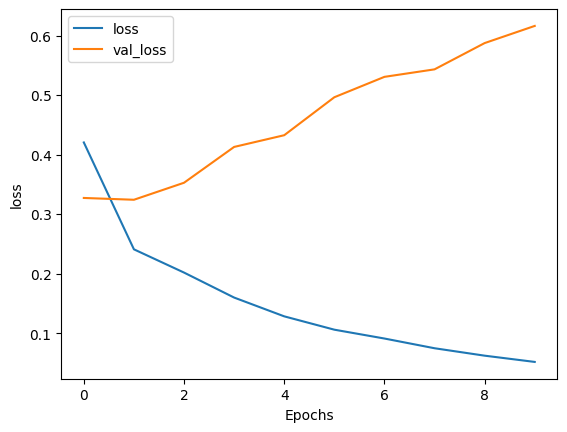

In [14]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
[[0.04419973]]


In [16]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim),
      tf.keras.layers.Conv1D(64, 5, activation='relu'),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6248 - loss: 0.6309 - val_accuracy: 0.8209 - val_loss: 0.4022
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8622 - loss: 0.3357 - val_accuracy: 0.8523 - val_loss: 0.3502
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9119 - loss: 0.2337 - val_accuracy: 0.8534 - val_loss: 0.3560
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9311 - loss: 0.1799 - val_accuracy: 0.8456 - val_loss: 0.3914
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9512 - loss: 0.1417 - val_accuracy: 0.8452 - val_loss: 0.4106
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9615 - loss: 0.1136 - val_accuracy: 0.8458 - val_loss: 0.4653
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9684 - loss: 0.0945 - val_accuracy: 0.8446 - val_loss: 0.5052
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9763 - loss: 0.0758 - val_

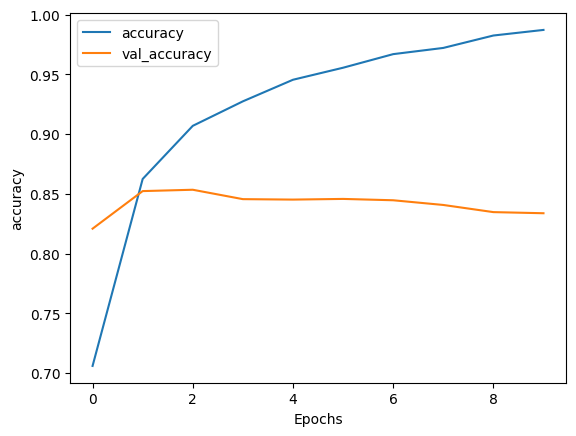

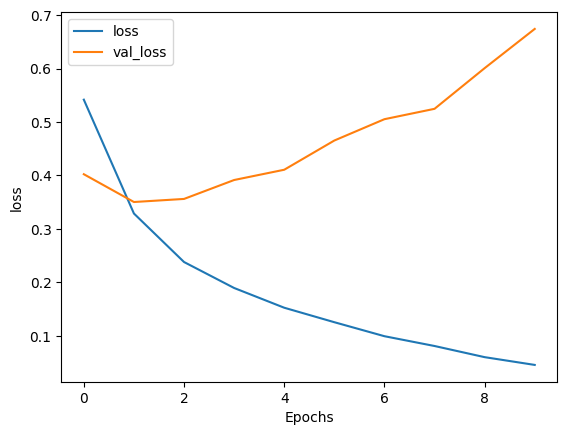

In [18]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [19]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[0.7375951]]
